In [1]:
import numpy as np
import os
import argparse
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt

In [43]:
def apply_alpha_blend(image_path: str, distance_threshold: float = 0.15) -> Image:
    img = Image.open(image_path)
    img_array = np.array(img)

    orig_alpha = img_array[:, :, 3]   
    leaf_mask = orig_alpha > 0
    img_array = img_array[:, :, :3]


    img_height, img_width = leaf_mask.shape
    # Each pixel value is the sum of the row (leaf's width) it belongs to
    width_arr = np.repeat(leaf_mask.sum(axis=1), img_width).reshape(img_height, img_width)

    # Apply distance transform divided by width
    alpha = distance_transform_edt(leaf_mask) / (width_arr ** 0.5)
    # Fill nans with 0
    alpha = np.nan_to_num(alpha)
    # Normalize alpha values to [0, 1]
    alpha = alpha / alpha.max()
    # Threshold alpha values
    alpha[alpha > distance_threshold] = 1
    alpha[alpha > 0] += 0.3
    alpha[alpha > 1] = 1
    # Convert alpha values to uint8
    alpha = (255 * alpha).astype(np.uint8)
    # take min of original alpha and new alpha
    alpha = np.minimum(alpha, orig_alpha)
    alpha = alpha[:, :, np.newaxis]

    # Create RGBA image with alpha blending
    rgba_img = Image.fromarray(np.concatenate([img_array, alpha], axis=2), mode='RGBA')

    return rgba_img

In [61]:
img_path = '/home/rotem.green/GIP-Leaf-Segmentation-Challenge-Project/datasets/06 - Leaves/A4_clean/plant0857_17.png'
img = Image.open(img_path)
img_no_alpha = img.convert('RGB')
alpha_005 = apply_alpha_blend(img_path, distance_threshold=0.05)
alpha_01 = apply_alpha_blend(img_path, distance_threshold=0.1)
alpha_015 = apply_alpha_blend(img_path, distance_threshold=0.15)


/home/rotem.green/miniconda3/envs/leafseg/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


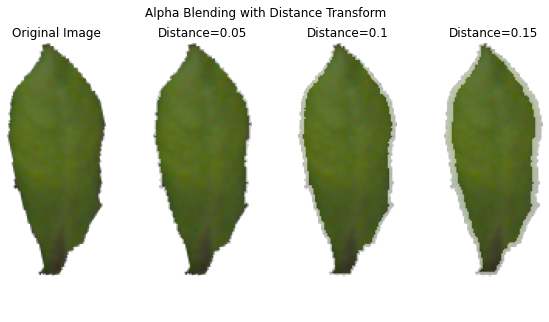

In [62]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(alpha_005)
plt.title('Distance=0.05')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(alpha_01)
plt.title('Distance=0.1')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(alpha_015)
plt.title('Distance=0.15')
plt.axis('off')

plt.suptitle('Alpha Blending with Distance Transform')
plt.show()


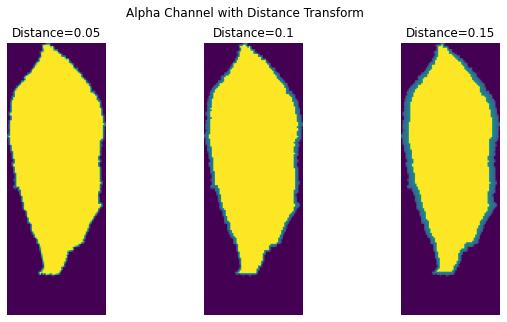

In [63]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.array(alpha_005)[..., 3])
plt.title('Distance=0.05')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.array(alpha_01)[..., 3])
plt.title('Distance=0.1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.array(alpha_015)[..., 3])
plt.title('Distance=0.15')
plt.axis('off')

plt.suptitle('Alpha Channel with Distance Transform')
plt.show()
